<a href="https://www.kaggle.com/code/egyfirst/training-mnist-dataset-to-get-97?scriptVersionId=127741545" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import time
import os.path

import warnings
warnings.filterwarnings('ignore')

In [2]:
# install DenMune clustering algorithm using pip command from the offecial Python repository, PyPi
# from https://pypi.org/project/denmune/
!pip install denmune

# now import it
from denmune import DenMune

     |████████████████████████████████| 41 kB 446 kB/s             
     |████████████████████████████████| 9.2 MB 8.6 MB/s            


In [3]:
data_path = '../input/digit-recognizer/'  
file_2d = 'mnist-2d.csv'

X_train = pd.read_csv( data_path + 'train.csv', sep=',')
X_test = pd.read_csv( data_path +'test.csv', sep=',')
y_train = X_train['label']
X_train = X_train.drop(['label'], axis=1)

# let us train the dataset

validity_key = "F1" 
scores = []
score = 0
best_knn = 0
best_score = -1

for knn in range (10, 100):   # knn ==> k-nearest neighbor, the only parameter required by the algorithm
    dm = DenMune(train_data=X_train,
              train_truth=y_train,
              test_data=X_test, 
              k_nearest=knn,
              file_2d=file_2d,
              rgn_tsne=False)
    labels, validity = dm.fit_predict(show_plots=False, show_analyzer=False)
    score = validity['train'][validity_key]
    
    if score > best_score:
        best_score = score
        best_knn = knn
        
        
    print ('k=' , knn, validity_key , 'score:', round(score*100,2) , '%, best score:',  round(best_score*100,2) , '% at k=', best_knn)
    scores.append([knn, score])


I am in One
k= 10 F1 score: 88.92 %, best score: 88.92 % at k= 10
I am in One
k= 11 F1 score: 90.14 %, best score: 90.14 % at k= 11
I am in One
k= 12 F1 score: 90.97 %, best score: 90.97 % at k= 12
I am in One
k= 13 F1 score: 91.97 %, best score: 91.97 % at k= 13
I am in One
k= 14 F1 score: 92.3 %, best score: 92.3 % at k= 14
I am in One
k= 15 F1 score: 92.58 %, best score: 92.58 % at k= 15
I am in One
k= 16 F1 score: 91.77 %, best score: 92.58 % at k= 15
I am in One
k= 17 F1 score: 94.07 %, best score: 94.07 % at k= 17
I am in One
k= 18 F1 score: 92.89 %, best score: 94.07 % at k= 17
I am in One
k= 19 F1 score: 93.7 %, best score: 94.07 % at k= 17
I am in One
k= 20 F1 score: 94.57 %, best score: 94.57 % at k= 20
I am in One
k= 21 F1 score: 80.54 %, best score: 94.57 % at k= 20
I am in One
k= 22 F1 score: 93.18 %, best score: 94.57 % at k= 20
I am in One
k= 23 F1 score: 94.91 %, best score: 94.91 % at k= 23
I am in One
k= 24 F1 score: 94.43 %, best score: 94.91 % at k= 23
I am in One
k

I am in One
Plotting dataset Groundtruth


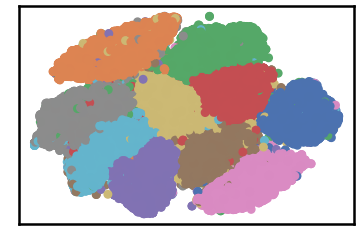

Plotting train data


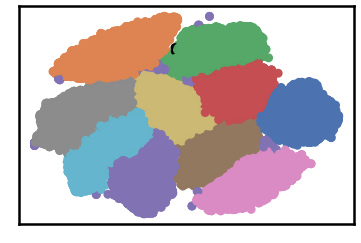

Validating train data
├── exec_time
│   ├── DenMune: 288.214
│   ├── NGT: 9.136
│   └── t_SNE: 0
├── n_clusters
│   ├── actual: 10
│   └── detected: 10
├── n_points
│   ├── dim: 784
│   ├── noise
│   │   ├── type-1: 2
│   │   └── type-2: 0
│   ├── plot_size: 42000
│   ├── size: 70000
│   ├── strong: 38267
│   └── weak
│       ├── all: 31733
│       ├── failed to merge: 0
│       └── succeeded to merge: 31733
└── validity
    └── train
        ├── ACC: 40564
        ├── AMI: 0.913
        ├── ARI: 0.926
        ├── F1: 0.966
        ├── NMI: 0.913
        ├── completeness: 0.913
        └── homogeneity: 0.913

Plotting test data


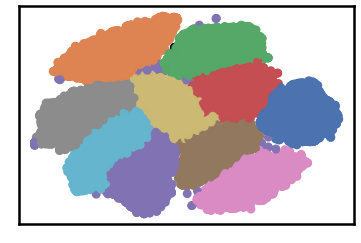

In [4]:
# chhose best_knn to predict test data
dm = DenMune(train_data=X_train,
              train_truth=y_train,
              test_data=X_test, 
              k_nearest=best_knn,
              file_2d=file_2d,
              rgn_tsne=False)
labels, validity = dm.fit_predict(show_plots=True, show_analyzer=True)

In [5]:
# prepare our output to be submitted to the dataset kaggle competition
ImageID = np.arange(len(X_test))+1
Out = pd.DataFrame([ImageID,labels['test']]).T
Out.to_csv('submission.csv', header =  ['ImageId', 'Label' ], index = None)
